## 4.9 Data Visualization

### This script contains the following points:

#### 1. Import Data
#### 2. Bar Chart
#### 3. Exporting Charts
#### 4. Creating Histograms and Scatterplots
#### 5. Creating Line Charts
#### 6. Task
###### 6.3 Create a histrogram of the order_hour_of_day column
###### 6.4 Create a bar chart from the loyalty_flag column
###### 6.5 Check difference in prices dependin on the hour of the day
###### 6.6 Determine if there is a connection between age and family situation with a line chart exploring connection between age and number of dependents
###### 6.7 Explore if there is a connection between age and income creating a scatterplot 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 1. Import Data

In [4]:
#Import Data
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

# Importing products df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

#### 2. Bar Chart

<Axes: xlabel='order_day_of_week'>

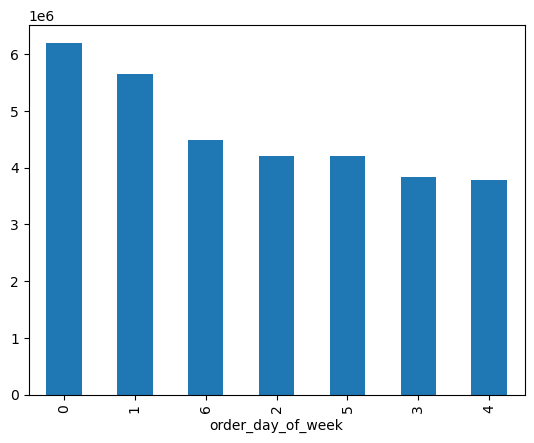

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

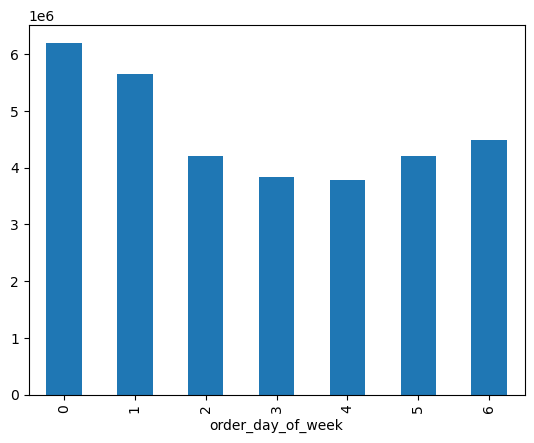

In [7]:
# order by day of week
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

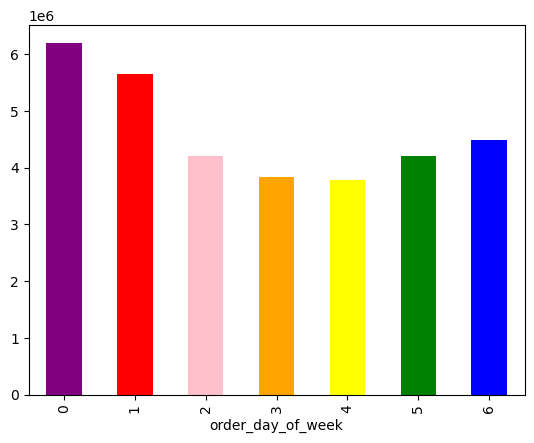

In [8]:
# change color of bars
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### 3. Exporting Charts

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 4. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

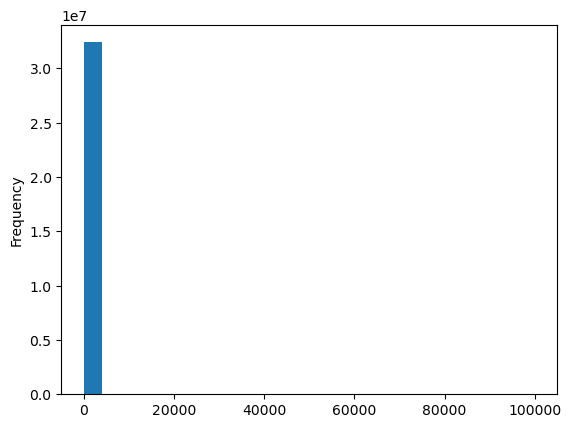

In [10]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
# --> this does not look right, we should have gotten 25. Let's analyze the data

In [11]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

In [ ]:
# --> the max is so high we can deduce there is some data corruption

<Axes: xlabel='prices', ylabel='prices'>

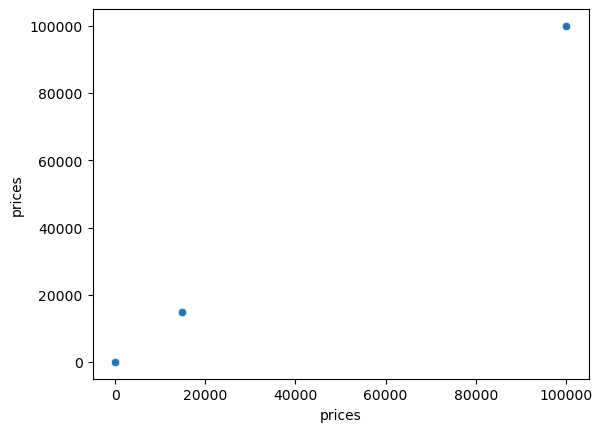

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regular Days,Most orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regular Days,Average orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regular Days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest Days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest Days,Average orders,16,Regular customer,High spender,114.426619,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest Days,Most orders,15,Regular customer,High spender,451.153540,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest Days,Average orders,12,Regular customer,High spender,1178.381871,12.0,Regular customer


In [19]:
# --> There are 5127 outliers skewing the data

# remove value of these outliers 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

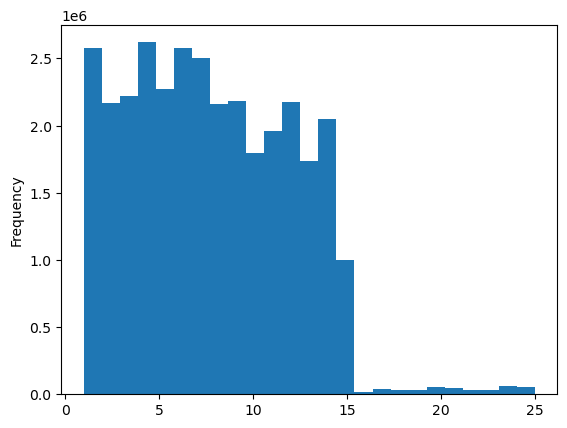

In [20]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

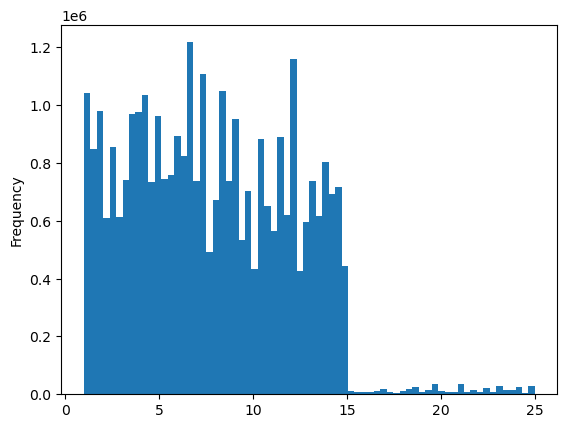

In [21]:
ords_prods_merge['prices'].plot.hist(bins = 70)

#### 5. Creating Line Charts after sampling

In [23]:
df = ords_prods_merge[:2000000]

In [24]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [26]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [28]:
len(ords_prods_merge)

32404859

In [27]:
len(big) + len(small)

32404859

In [30]:
df_2 = small[['order_day_of_week','prices']]

In [31]:
df_2.head()

,order_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


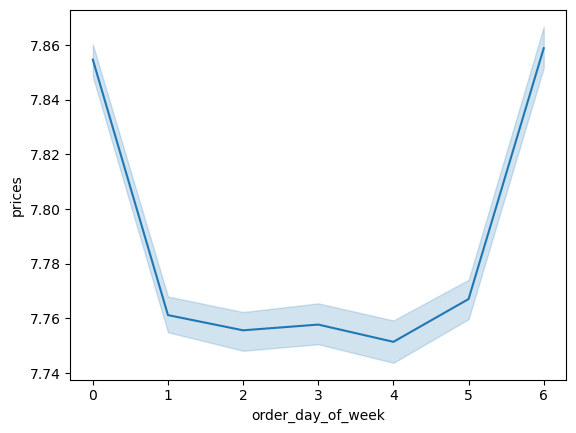

In [33]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [34]:
line

<Axes: xlabel='order_day_of_week', ylabel='prices'>

#### 6. Task

In [5]:
# Importing new df
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,...,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,...,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,...,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,...,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,...,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both


###### 6.3 Create a histrogram of the order_hour_of_day column

([<matplotlib.axis.XTick at 0x190f7801e90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

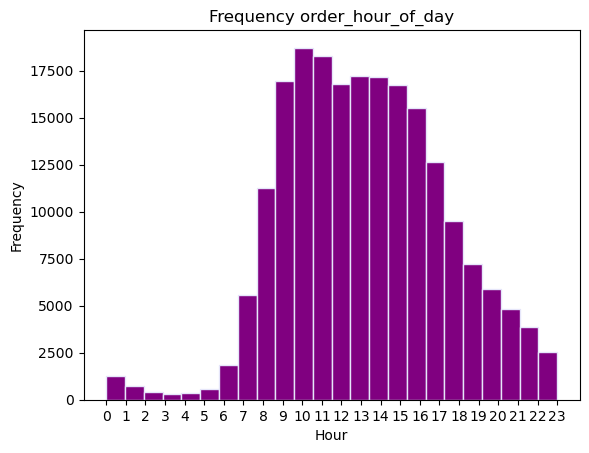

In [25]:
#check for histogram options in the library
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
histogram = df_final['order_hour_of_day'].plot.hist(bins=24, color='purple',edgecolor='lavender')
plt.title('Frequency order_hour_of_day')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))

In [27]:
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram order_hour_of_day.png'))

###### The histogram shows that busiest hours are 10,11, 9 and 12. Orders start going up at 8am until 6pm 

###### 6.4 Create a bar chart from the loyalty_flag column

In [20]:
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,...,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,...,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,...,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,...,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,...,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,300,Organic Enriched Unbleached White Flour,17,13,3.7,2105642,168073,4,4,12,...,Lisa,Case,Female,North Carolina,44,2020-04-01,1,married,148828,both
206205,300,Organic Enriched Unbleached White Flour,17,13,3.7,2979863,49635,6,0,17,...,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,both
206206,300,Organic Enriched Unbleached White Flour,17,13,3.7,1258582,135902,14,1,10,...,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,both
206207,300,Organic Enriched Unbleached White Flour,17,13,3.7,1093020,81095,11,1,9,...,Rose,Rollins,Female,California,27,2020-04-01,1,married,99799,both


In [21]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', 'price_range', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_flag', 'avg_price_purchases', 'median_days_between_orders',
       'order_frequency', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       '_merge'],
      dtype='object')

Text(0.5, 0, '')

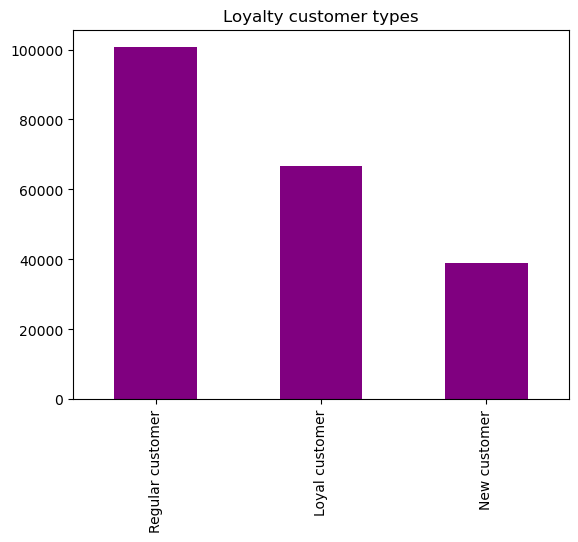

In [54]:
barchart = df_final['loyalty_flag'].value_counts().plot.bar(color='purple')
plt.title('Loyalty customer types')
plt.ylabel('')
plt.xlabel('')

In [45]:
barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty_flag.png'))

###### 6.5 Check difference in prices dependin on the hour of the day

In [7]:
#Before starting with the task, create a subset of the data
np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7
big = df_final[dev]
small = df_final[~dev]

In [30]:
big

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,...,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,...,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,133128,16,1,7,...,Cynthia,Noble,Female,Kentucky,43,2017-01-01,2,married,49643,both
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,168851,12,3,10,...,Joseph,Hickman,Male,South Carolina,30,2017-01-01,0,single,63712,both
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,69965,10,1,20,...,Jeremy,Vang,Male,Texas,47,2017-01-01,1,married,162432,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206203,300,Organic Enriched Unbleached White Flour,17,13,3.7,1202218,122741,12,5,12,...,Carl,Weber,Male,Michigan,24,2020-04-01,2,married,73357,both
206204,300,Organic Enriched Unbleached White Flour,17,13,3.7,2105642,168073,4,4,12,...,Lisa,Case,Female,North Carolina,44,2020-04-01,1,married,148828,both
206205,300,Organic Enriched Unbleached White Flour,17,13,3.7,2979863,49635,6,0,17,...,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,both
206206,300,Organic Enriched Unbleached White Flour,17,13,3.7,1258582,135902,14,1,10,...,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,both


In [31]:
small

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,...,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,...,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,...,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,152052,3,2,14,...,Chris,Walton,Male,Montana,20,2017-01-01,0,single,61746,both
10,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,26441,1,5,11,...,Gloria,Stafford,Female,Nevada,19,2017-01-01,2,living with parents and siblings,43443,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206195,300,Organic Enriched Unbleached White Flour,17,13,3.7,788932,205766,3,3,0,...,Amanda,Hodge,Female,Oregon,18,2020-04-01,2,living with parents and siblings,48510,both
206199,300,Organic Enriched Unbleached White Flour,17,13,3.7,3047843,179673,16,0,17,...,Adam,Villanueva,Male,Wyoming,77,2020-04-01,0,divorced/widowed,162239,both
206201,300,Organic Enriched Unbleached White Flour,17,13,3.7,2604220,75529,43,0,17,...,Kathy,Avila,Female,West Virginia,25,2020-04-01,2,married,56513,both
206202,300,Organic Enriched Unbleached White Flour,17,13,3.7,2712865,157533,36,0,19,...,Ned,Stark,Male,Utah,53,2020-04-01,0,single,35973,both


In [9]:
df_final.shape

(206209, 34)

In [10]:
len(big)

144483

In [11]:
len(small)

61726

In [12]:
len(big) + len(small)

206209

In [ ]:
# After checking the size of the random samples, starting the exercise

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x190fbb93150>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

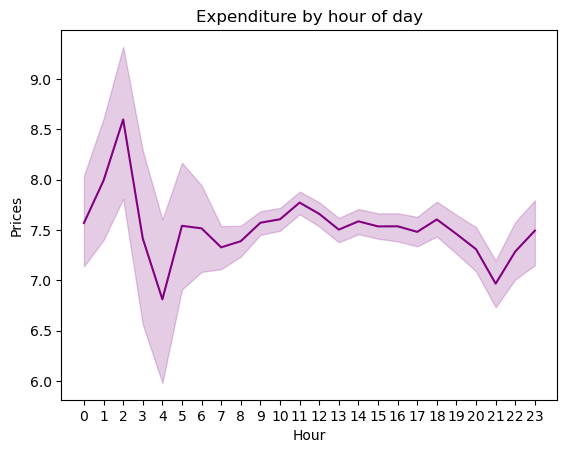

In [43]:
#check for params for line chart
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
linechart = sns.lineplot(data = small,x = 'order_hour_of_day', y = 'prices', color = 'purple')
plt.title('Expenditure by hour of day')
plt.ylabel('Prices')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))

In [47]:
linechart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_by_hour.png'))

###### There is an increase on expenditure between 9pm and 2am. After the 2am drop, expenditure slowly increases during the day until 6pm

###### 6.6 Determine if there is a connection between age and family situation with a line chart exploring connection between age and number of dependents

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

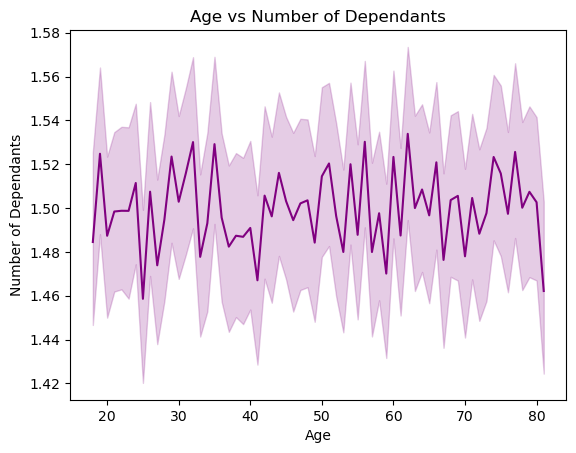

In [58]:
linechart2 = sns.lineplot(data = df_final, x = 'age', y = 'number_of_dependants', color = 'purple')
plt.title('Age vs Number of Dependants')
plt.ylabel('Number of Dependants')
plt.xlabel('Age')

In [59]:
linechart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_by_hour.png'))

###### There seems to be no correlation between age and number of dependants

###### 6.7 Explore if there is a connection between age and income creating a scatterplot 

Text(0.5, 0, 'Age')

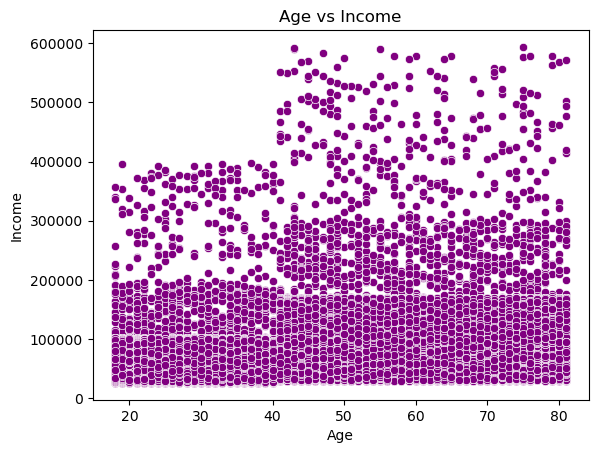

In [56]:
scatterplot = sns.scatterplot(data = df_final, x = 'age', y = 'income', color = 'purple')
plt.title('Age vs Income')
plt.ylabel('Income')
plt.xlabel('Age')

In [57]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

###### There seems to be a slight increase on income after age 40. Most income is situated below 200000 for all ages though.